# MINI PROJECT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from category_encoders import HashingEncoder

**Mengimpor Data**

In [2]:
df = pd.read_csv("/Users/anastyarachmaindiarto/Downloads/kaggle/university_world_ranking.csv")
df

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-


Setelah membaca data, berikut merupakan informasi mengenai DataFrame tersebut.

| **Nama Kolom**                       | **Deskripsi**                                                              | **Tipe Data**     
|--------------------------------------|----------------------------------------------------------------------------|---------------------
| `2025 Rank`                          | QS ranking universitas pada tahun 2025                                     | Categorical
| `2024 Rank`                          | QS ranking universitas pada tahun 2024                                     | Categorical
| `Institution Name`                   | Nama universitas atau institusi/lembaga                                    | Categorical
| `Location`                           | Kode/singkatan negara dimana universitas tersebut berasal                  | Categorical
| `Location Full`                      | Negara dimana universitas tersebut berasal                                 | Categorical
| `Size`                               | Klasifikasi ukuran lembaga                                                 | Categorical
| `Academic Reputation`                | Skor dari survei akademis global                                           | Numerical
| `Employer Reputation`                | Skor dari survei perusahaan tentang kualitas lulusan                       | Numerical
| `Faculty Student`                    | Mengukur rasio mahasiswa terhadap dosen                                    | Numerical
| `Citations per Faculty`              | Dampak penelitian berdasarkan jumlah sitasi per fakultas                   | Numerical
| `International Faculty`              | Persentase dari jumlah fakultas internasional                              | Numerical
| `International Students`             | Persentase dari jumlah mahasiswa internasional                             | Numerical
| `International Research Network`     | Skor yang mencerminkan kolaborasi penelitian internasional                 | Numerical
| `Employment Outcomes`                | Skor untuk keberhasilan penempatan kerja alumni                            | Numerical
| `Sustainability`                     | Mengukur seberapa keberlanjutan dan ramah libgkungan lembaga tersebut      | Numerical
| `QS Overall Score`                   | Skor total akhir yang menggabungkan semua komponen QS                      | Categorical

---

### Memeriksa tipe data, ukuran dataset, serta karakteristik awal.

In [3]:
# Memeriksa jumlah baris dan kolom pada dataset
df.shape

(1503, 16)

Dataset ini memiliki **1503 baris** dan **16 kolom**.

In [4]:
# Memeriksa nama kolom pada dataset
print(f"Nama-nama kolom pada dataset ini adalah sebagai berikut. \n{df.columns}")

Nama-nama kolom pada dataset ini adalah sebagai berikut. 
Index(['2025 Rank', '2024 Rank', 'Institution Name', 'Location',
       'Location Full', 'Size', 'Academic Reputation', 'Employer Reputation',
       'Faculty Student', 'Citations per Faculty', 'International Faculty',
       'International Students', 'International Research Network',
       'Employment Outcomes', 'Sustainability', 'QS Overall Score'],
      dtype='object')


In [5]:
# Memahami tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2025 Rank                       1503 non-null   object 
 1   2024 Rank                       1482 non-null   object 
 2   Institution Name                1503 non-null   object 
 3   Location                        1503 non-null   object 
 4   Location Full                   1503 non-null   object 
 5   Size                            1503 non-null   object 
 6   Academic Reputation             1503 non-null   float64
 7   Employer Reputation             1503 non-null   float64
 8   Faculty Student                 1503 non-null   float64
 9   Citations per Faculty           1503 non-null   float64
 10  International Faculty           1403 non-null   float64
 11  International Students          1445 non-null   float64
 12  International Research Network  15

Seperti yang terdapat pada informasi dataset, diketahui bahwa:
1. Dataset memiliki 1503 baris dan 16 kolom, yang artinya terdapat kolom yang memiliki nilai yang hilang (missing value), yaitu kolom "2024 Rank", "International Faculty", "International Students", "International Research Network", dan "Sustainability".
2. Memiliki 7 tipe kategorikal pada data dan 9 tipe numerik.

In [6]:
# Mengetahui statistik deskriptif pada data numerik
df.describe()

,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability
count,1503.00000,1503.000000,1503.000000,1503.000000,1403.000000,1445.000000,1502.000000,1503.000000,1484.000000
mean,20.28656,19.786693,28.128676,23.503460,30.725374,25.580346,50.129095,23.825083,24.309299
std,22.32623,23.784986,27.613017,27.870692,34.328935,31.098689,29.866588,27.351315,31.074718
min,1.30000,1.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000
25%,6.30000,4.300000,7.300000,2.800000,4.200000,2.900000,22.725000,4.000000,1.300000
50%,11.00000,9.400000,16.000000,9.900000,12.500000,9.600000,51.100000,11.800000,6.750000
75%,23.50000,25.300000,40.400000,36.400000,51.600000,38.300000,77.100000,33.400000,39.500000
max,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Tabel tersebut menunjukkan **ringkasan nilai** dari berbagai indikator QS untuk **lebih dari 1500 universitas di dunia**. Setiap kolom adalah **salah satu aspek penilaian** dan angka **0-100** menunjukkan bahwa makin besarnya angka, maka semakin baik.

| **Kolom**     | **Cara Membaca Baris**                               | 
|---------------|-------------------------------------------------------|
| `count`    | Menghitung jumlah data pada setiap kolom | 
| `mean`     | Nilai rata-rata seluruh universitas |
| `std`     | Melihat seberapa beragam nilai-nilai indikator penilaian | 
| `min`     | Melihat nilai yang paling rendah | 
| `25%`     | 25% data universitas terburuk |
| `50% (median)`     | titik tengah pada data |
| `75%`     | 25% data universitas terbaik |
| `max`     | Melihat nilai tertinggi (universitas paling unggul di dunia) |

Statistik deskriptif menunjukkan bahwa sebagian besar universitas memiliki **nilai rendah pada hampir semua indikator QS**. Hal ini mengindikasikan bahwa **universitas dengan reputasi global dan kinerja riset tinggi** merupakan kelompok kecil yang mendominasi peringkat teratas, sementara mayoritas universitas lainnya masih berada pada level menengah ke bawah.

## Data Cleaning

### Memeriksa konsistensi data

In [7]:
# Nilai unik untuk kategorikal

cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns

cat_values = []

for col in cat_cols:
    cat_values.append({
        "column": col,
        "unique_values": df[col].dropna().unique().tolist(),
        "n_unique": df[col].nunique(dropna=True)
    })

cat_values_df = pd.DataFrame(cat_values)

pd.set_option("display.max_colwidth", 100)
cat_values_df

,column,unique_values,n_unique
0,2025 Rank,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, ...",388
1,2024 Rank,"[1, 6, 3, 4, 2, 5, 7, 8, 9, 15, 12, 10, 14, 17, 26, 13, 19, 25, 11, 16, 24, 21, 36, 22, 37, 30, ...",378
2,Institution Name,"[Massachusetts Institute of Technology (MIT) , Imperial College London, University of Oxford, Ha...",1503
3,Location,"[US, UK, CH, SG, AU, CN, HK, FR, CA, DE, KR, JP, NL, MY, BE, NZ, TW, AR, SE, IE, BR, CL, RU, MX,...",106
4,Location Full,"[United States, United Kingdom, Switzerland, Singapore, Australia, China (Mainland), Hong Kong S...",106
5,Size,"[M, L, XL, S]",4
6,QS Overall Score,"[100, 98.5, 96.9, 96.8, 96.7, 96.1, 93.9, 93.7, 91.6, 90.9, 90.3, 90.1, 88.9, 88.5, 88.4, 87.9, ...",363


In [8]:
# Mengetahui isi data kategorikal satu persatu
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns

cat_values = {}

for col in cat_cols:
    cat_values[col] = df[col].dropna().unique().tolist()

cat_values

{'2025 Rank': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '34',
  '36',
  '37',
  '38',
  '39',
  '40',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '49',
  '50',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '60',
  '61',
  '62',
  '63',
  '65',
  '66',
  '67',
  '68',
  '69',
  '71',
  '72',
  '73',
  '74',
  '75',
  '76',
  '77',
  '78',
  '79',
  '80',
  '82',
  '84',
  '86',
  '87',
  '88',
  '89',
  '92',
  '93',
  '94',
  '96',
  '97',
  '98',
  '99',
  '100',
  '101',
  '102',
  '103',
  '104',
  '105',
  '107',
  '108',
  '109',
  '111',
  '113',
  '114',
  '115',
  '116',
  '117',
  '118',
  '119',
  '120',
  '122',
  '123',
  '125',
  '126',
  '128',
  '129',
  '130',
  '131',
  '132',
  '133',
  '145',
  '136',
  '137',
  '138',
  '139',
  '141',
  '144',
 

In [9]:
# Proporsi data kategorikal

cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns

for col in cat_cols:
    print(f"\nDistribusi {col}")
    print(df[col].value_counts(dropna=False))


Distribusi 2025 Rank
2025 Rank
1201-1400    199
1001-1200    197
1401+        102
951-1000      53
901-950       51
            ... 
164            1
163            1
162            1
161            1
248            1
Name: count, Length: 388, dtype: int64

Distribusi 2024 Rank
2024 Rank
1201-1400    206
1001-1200    199
1401+         78
951-1000      54
801-850       52
            ... 
214            1
167            1
188            1
198            1
261            1
Name: count, Length: 379, dtype: int64

Distribusi Institution Name
Institution Name
Massachusetts Institute of Technology (MIT)                                          1
University of Parma                                                                  1
Amrita Vishwa Vidyapeetham                                                           1
Amity University                                                                     1
Aligarh Muslim University                                                            1
   

In [10]:
# Mengetahui isi data numerik satu persatu
cat_cols = df.select_dtypes(include=["number"]).columns

cat_values = {}

for col in cat_cols:
    cat_values[col] = df[col].dropna().unique().tolist()

cat_values

{'Academic Reputation': [100.0,
  98.5,
  98.8,
  99.5,
  96.5,
  96.3,
  91.9,
  98.3,
  97.4,
  96.4,
  90.5,
  99.2,
  99.1,
  99.8,
  99.9,
  74.4,
  99.7,
  84.2,
  83.0,
  94.3,
  93.8,
  86.0,
  99.6,
  95.6,
  86.7,
  89.2,
  85.7,
  90.3,
  97.9,
  84.0,
  44.7,
  81.1,
  75.3,
  67.2,
  87.7,
  75.8,
  83.8,
  81.5,
  68.0,
  69.8,
  92.2,
  82.9,
  60.9,
  84.6,
  87.2,
  82.2,
  93.5,
  78.2,
  93.4,
  72.2,
  83.9,
  94.1,
  89.3,
  60.7,
  45.2,
  68.3,
  81.9,
  55.5,
  77.4,
  59.9,
  68.9,
  50.1,
  56.0,
  70.5,
  76.9,
  75.1,
  82.4,
  69.5,
  43.9,
  59.6,
  76.6,
  63.3,
  92.8,
  93.7,
  78.0,
  97.0,
  57.0,
  80.3,
  45.9,
  46.6,
  74.0,
  38.0,
  44.9,
  61.4,
  46.5,
  58.3,
  66.5,
  73.8,
  61.1,
  33.2,
  70.8,
  61.9,
  45.7,
  67.1,
  40.4,
  77.7,
  62.3,
  58.5,
  55.6,
  48.3,
  32.6,
  29.8,
  57.9,
  50.4,
  51.4,
  52.5,
  50.0,
  63.0,
  26.6,
  80.7,
  80.8,
  33.4,
  57.1,
  28.7,
  70.9,
  61.7,
  26.3,
  82.8,
  38.9,
  68.4,
  39.1,
  54.7,


In [11]:
import pandas as pd

summary = pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.astype(str),
    "n_unique": df.nunique(),
    "unique_values_sample": [
        df[col].dropna().unique()[:100] for col in df.columns
    ]
})

summary

,column,dtype,n_unique,unique_values_sample
2025 Rank,2025 Rank,object,388,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, ..."
2024 Rank,2024 Rank,object,378,"[1, 6, 3, 4, 2, 5, 7, 8, 9, 15, 12, 10, 14, 17, 26, 13, 19, 25, 11, 16, 24, 21, 36, 22, 37, 30, ..."
Institution Name,Institution Name,object,1503,"[Massachusetts Institute of Technology (MIT) , Imperial College London, University of Oxford, Ha..."
Location,Location,object,106,"[US, UK, CH, SG, AU, CN, HK, FR, CA, DE, KR, JP, NL, MY, BE, NZ, TW, AR, SE, IE, BR, CL, RU, MX,..."
Location Full,Location Full,object,106,"[United States, United Kingdom, Switzerland, Singapore, Australia, China (Mainland), Hong Kong S..."
Size,Size,object,4,"[M, L, XL, S]"
Academic Reputation,Academic Reputation,float64,472,"[100.0, 98.5, 98.8, 99.5, 96.5, 96.3, 91.9, 98.3, 97.4, 96.4, 90.5, 99.2, 99.1, 99.8, 99.9, 74.4..."
Employer Reputation,Employer Reputation,float64,500,"[100.0, 99.5, 87.2, 91.1, 98.3, 95.3, 91.9, 93.9, 96.6, 73.3, 93.1, 59.4, 90.0, 90.4, 97.7, 96.4..."
Faculty Student,Faculty Student,float64,590,"[100.0, 98.2, 96.3, 65.9, 68.8, 95.9, 99.8, 23.5, 15.4, 92.6, 80.6, 52.7, 81.2, 10.9, 20.6, 95.0..."
Citations per Faculty,Citations per Faculty,float64,566,"[100.0, 93.9, 84.8, 84.6, 99.0, 97.9, 93.1, 72.2, 74.0, 98.2, 93.0, 97.7, 92.4, 97.5, 86.4, 93.7..."


### Checking issue

In [12]:
# Mengetahui jumlah missing value pada setiap kolom
missing_df = pd.DataFrame({
    "Jumlah Missing Value": df.isna().sum(),
    "Persentase Missing Value": (df.isna().mean() * 100).round(2).astype(str) + "%"
})

# Menambahkan header untuk nama kolom
missing_df.index.name = "Nama Kolom"

missing_df

,Jumlah Missing Value,Persentase Missing Value
Nama Kolom,,
2025 Rank,0,0.0%
2024 Rank,21,1.4%
Institution Name,0,0.0%
Location,0,0.0%
Location Full,0,0.0%
Size,0,0.0%
Academic Reputation,0,0.0%
Employer Reputation,0,0.0%
Faculty Student,0,0.0%


**Terdapat kolom yang memiliki missing value, di antaranya sebagai berikut.**
1. 2024 Rank dengan 21 missing values dengan 1,4% nilai yang hilang.
2. International Faculty dengan 100 missing values dengan 6,65% nilai yang hilang.
3. International Students dengan 58 missing values dengan 3,86% nilai yang hilang.
4. International Research Network dengan 1 missing values dengan 0,07% nilai yang hilang.
5. Sustainability dengan 19 missing values dengan 1,26% nilai yang hilang.

In [13]:
# Memeriksa duplikasi data 
print(df.duplicated().sum())

0


Tidak ditemukan adanya data duplikasi pada dataset.

In [14]:
# Memeriksa outlier
cols = [
    "Academic Reputation",
    "Employer Reputation",
    "Faculty Student",
    "Citations per Faculty",
    "International Faculty",
    "International Students",
    "International Research Network",
    "Employment Outcomes",
    "Sustainability"
]

# Hitung Q1, Q3, IQR
q1 = df[cols].quantile(0.25)
q3 = df[cols].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Identifikasi outlier
outlier_mask = (df[cols] < lower) | (df[cols] > upper)
outlier_values = df[outlier_mask] # Untuk melihat nilai outlier
jumlah_outlier = outlier_mask.sum(axis=0)

# Total jumlah data (baris)
total_data = len(df)

# Hitung persentase outlier per kolom
persentase_outlier = (jumlah_outlier / total_data * 100).round(2).astype(str) + "%"

# Gabungkan jumlah & persentase ke dalam DataFrame
outlier_summary = pd.DataFrame({
    "Jumlah Outlier": jumlah_outlier,
    "Persentase Outlier (%)": persentase_outlier
})

outlier_summary

,Jumlah Outlier,Persentase Outlier (%)
Nama Kolom,,
Academic Reputation,164,10.91%
Employer Reputation,143,9.51%
Faculty Student,82,5.46%
Citations per Faculty,87,5.79%
International Faculty,0,0.0%
International Students,115,7.65%
International Research Network,0,0.0%
Employment Outcomes,129,8.58%
Sustainability,34,2.26%


Terlihat bahwa adanya indikasi nilai ekstrem pada dataset, namun semuanya memiliki persentase di bawah 15%. Sehingga hal ini dapat diputuskan dengan menghapus nilai ekstrem yang terdapat pada dataset tersebut. 

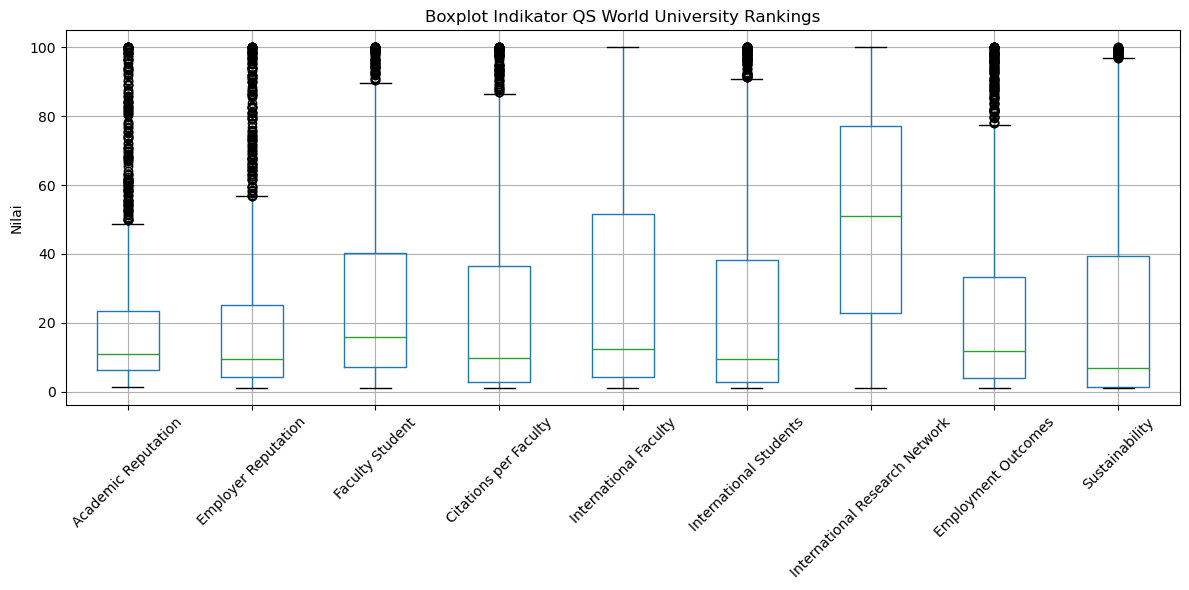

In [15]:
# Memeriksa outlier melalui boxplot
plt.figure(figsize=(12,6))
df[cols].boxplot(rot=45)
plt.title("Boxplot Indikator QS World University Rankings")
plt.ylabel("Nilai")
plt.tight_layout()
plt.show()

### Handling issue

In [16]:
# Mengubah tipe data menjadi numerik
df["2025 Rank"] = pd.to_numeric(df["2025 Rank"], errors="coerce").astype("Int64")
df["2024 Rank"] = pd.to_numeric(df["2024 Rank"], errors="coerce").astype("Int64")
df["QS Overall Score"] = pd.to_numeric(df["QS Overall Score"], errors="coerce")
df

Nama Kolom,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100.0
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,<NA>,<NA>,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,NaN
1499,<NA>,<NA>,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,NaN
1500,<NA>,<NA>,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,NaN
1501,<NA>,<NA>,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,NaN


In [17]:
# Menghapus missing value
# Menyalin data
df_handling = df.copy()

# Imputasi mean untuk International Faculty
df_handling["International Faculty"] = df_handling["International Faculty"].fillna(
    df_handling["International Faculty"].mean()
)

# Hapus missing value pada kolom dengan persentase < 5%
df_handling = df_handling.dropna(
    subset=["2025 Rank", "2024 Rank", "International Students", "International Research Network", "Sustainability", "QS Overall Score"]
)

df_handling

Nama Kolom,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100.0
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,596,491,University of Iowa,US,United States,L,18.4,8.7,41.7,19.1,15.5,3.7,75.6,26.6,20.8,20.8
599,596,520,University of Texas Dallas,US,United States,L,13.1,15.9,3.4,43.3,9.7,47.4,60.4,4.9,9.5,20.8
636,508,595,Shenzhen University,CN,China (Mainland),XL,7.7,3.2,42.1,64.5,11.0,1.4,65.1,15.8,7.4,23.9
651,501,511,East China Normal University,CN,China (Mainland),L,13.3,4.7,16.2,63.5,24.1,9.0,72.0,9.0,6.8,24.1


Mengubah tipe data untuk kolom **"2025 Rank"**, **"2024 Rank"**, dan **"QS Overall Score"** dari yang merupakan data kategorik menjadi data numerik karena untuk memenuhi kebutuhan analisis data. 

In [18]:
# Mengetahui jumlah missing value pada setiap kolom
missing_df_new = pd.DataFrame({
    "Jumlah Missing Value": df_handling.isna().sum(),
    "Persentase Missing Value": (df_handling.isna().mean() * 100).round(2).astype(str) + "%"
})

# Menambahkan header untuk nama kolom
missing_df_new.index.name = "Nama Kolom"

missing_df_new

,Jumlah Missing Value,Persentase Missing Value
Nama Kolom,,
2025 Rank,0,0.0%
2024 Rank,0,0.0%
Institution Name,0,0.0%
Location,0,0.0%
Location Full,0,0.0%
Size,0,0.0%
Academic Reputation,0,0.0%
Employer Reputation,0,0.0%
Faculty Student,0,0.0%


Jumlah missing value sudah **berhasil ditangani**.

**Cek Outlier**

Outlier (nilai ekstrem) tidak dihapus karena data merupakan data ranking.

In [19]:
# Feature Engineering

df_done = df_handling.copy()

asia = [
    "Indonesia","Malaysia","Singapore","Thailand","Vietnam","Philippines","Japan","South Korea",
    "China (Mainland)","Hong Kong SAR","Taiwan","India","Pakistan","Bangladesh","Sri Lanka",
    "Turkey","Iran","Iraq","Lebanon","Nepal","Kazakhstan","Uzbekistan","Azerbaijan","Armenia",
    "Georgia","Mongolia","Brunei","Cambodia","Laos","Myanmar","Afghanistan"
]

europe = [
    "United Kingdom","Ireland","France","Germany","Netherlands","Belgium","Luxembourg",
    "Spain","Portugal","Italy","Switzerland","Austria","Denmark","Sweden","Norway","Finland",
    "Iceland","Poland","Czech Republic","Slovakia","Hungary","Romania","Bulgaria","Greece",
    "Croatia","Slovenia","Serbia","Bosnia and Herzegovina","Montenegro","Albania",
    "Estonia","Latvia","Lithuania","Ukraine","Russia","Belarus","Moldova","Cyprus","Malta"
]

americas = [
    "United States","Canada","Mexico","Brazil","Argentina","Chile","Colombia","Peru",
    "Uruguay","Paraguay","Bolivia","Ecuador","Costa Rica","Panama","Guatemala",
    "Dominican Republic","Cuba","Jamaica","Trinidad and Tobago"
]

oceania = ["Australia","New Zealand"]

africa = [
    "South Africa","Egypt","Morocco","Tunisia","Algeria","Nigeria","Ghana","Kenya",
    "Ethiopia","Uganda","Tanzania","Zimbabwe","Zambia","Namibia","Botswana"
]

def map_region(country):
    if country in asia:
        return "Asia"
    elif country in europe:
        return "Europe"
    elif country in americas:
        return "Americas"
    elif country in oceania:
        return "Oceania"
    elif country in africa:
        return "Africa"
    else:
        return "Middle East"

df_done["Region"] = df_done["Location Full"].apply(map_region)

df_done


Nama Kolom,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score,Region
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100.0,Americas
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5,Europe
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9,Europe
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8,Americas
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,596,491,University of Iowa,US,United States,L,18.4,8.7,41.7,19.1,15.5,3.7,75.6,26.6,20.8,20.8,Americas
599,596,520,University of Texas Dallas,US,United States,L,13.1,15.9,3.4,43.3,9.7,47.4,60.4,4.9,9.5,20.8,Americas
636,508,595,Shenzhen University,CN,China (Mainland),XL,7.7,3.2,42.1,64.5,11.0,1.4,65.1,15.8,7.4,23.9,Asia
651,501,511,East China Normal University,CN,China (Mainland),L,13.3,4.7,16.2,63.5,24.1,9.0,72.0,9.0,6.8,24.1,Asia


Menambahkan kolom **Region** untuk mempermudah analisis lebih lanjut.

In [20]:
# Memeriksa informasi final df
df_done.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 0 to 1038
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2025 Rank                       568 non-null    Int64  
 1   2024 Rank                       568 non-null    Int64  
 2   Institution Name                568 non-null    object 
 3   Location                        568 non-null    object 
 4   Location Full                   568 non-null    object 
 5   Size                            568 non-null    object 
 6   Academic Reputation             568 non-null    float64
 7   Employer Reputation             568 non-null    float64
 8   Faculty Student                 568 non-null    float64
 9   Citations per Faculty           568 non-null    float64
 10  International Faculty           568 non-null    float64
 11  International Students          568 non-null    float64
 12  International Research Network  568 non-

## EDA

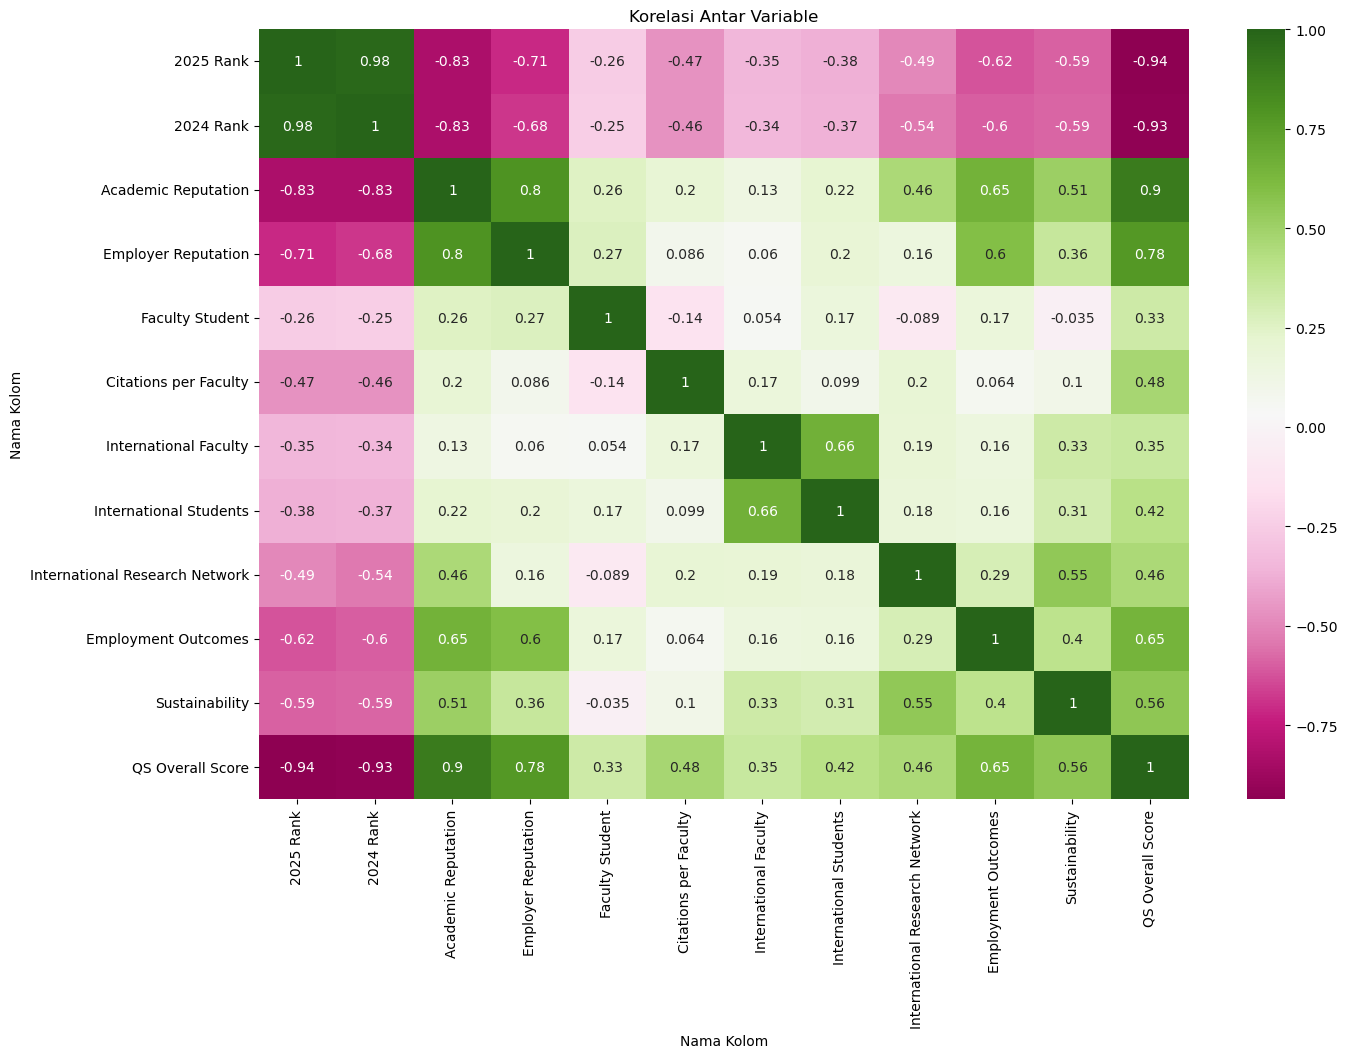

In [21]:
# Menghitung matriks korelasi
hm_data = df_done.corr(numeric_only=True)

# Memvisualisasikan heatmap untuk melihat korelasi antar variable
plt.figure(figsize=(15,10))
sns.heatmap(hm_data, annot=True,cmap="PiYG")
plt.title("Korelasi Antar Variable")
plt.show()

Berdasarkan heatmap tersebut, diketahui bahwa:
1. Academic Reputation memiliki korelasi paling tinggi dengan QS Overall Score.
   * Reputasi akademik menjadi penentu utama kualitas universitas versi QS.
2. Employer Reputation juga berperan besar
   * Pandangan dunia kerja terhadap lulusan suatu universitas juga sangat memengaruhi penilaian universitas.
3. Employment Outcomes dan Sustainability juga berperan besar
   * Artinya, QS Overall Score juga mencerminkan relevansi lulusan di dunia kerja dan komitmen keberlanjutan universitas.
5. International Students, International Faculty, dan International Research Network menunjukkan korelasi positif menengah.
   * Aspek-aspek ini penting, tetapi bukan faktor utama naiknya QS Overall Score untuk suatu universitas.
6. Citations per Faculty dan Faculty Student (ratio) memiliki korelasi yang lemah dengan QS Overall Score.
   * Kedua aspek tersebut berkontribusi tetapi tidak terlalu berdampak pada QS Overall Score.

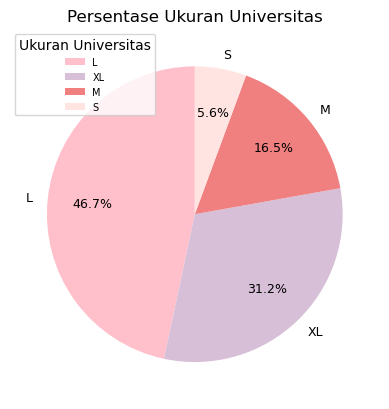

In [22]:
# Persentase ukuran universitas
df_sz = df_done["Size"].value_counts()

# Membuat pie chart untuk memvisualisasikan persentase ukuran universitas
plt.pie(df_sz,labels=df_sz.index, autopct="%1.1f%%", startangle=90, textprops={'fontsize': 9}, pctdistance=0.7, colors=['pink', 'thistle', 'lightcoral', 'mistyrose'])
plt.legend(df_sz.index, title="Ukuran Universitas",fontsize=7, title_fontsize=10)
plt.title("Persentase Ukuran Universitas", fontsize=12)
plt.show()

Visualisasi ini menunjukkan **persentase ukuran universitas** berdasarkan kategori **S**, **M**, **L**, dan **XL**. Dapat dilihat bahwa ukuran **L (large)** merupakan kategori yang **paling dominan**, yaitu sekitar **46,7%**. Artinya, sebagian besar universitas dalam dataset ini adalah universitas berukuran besar.

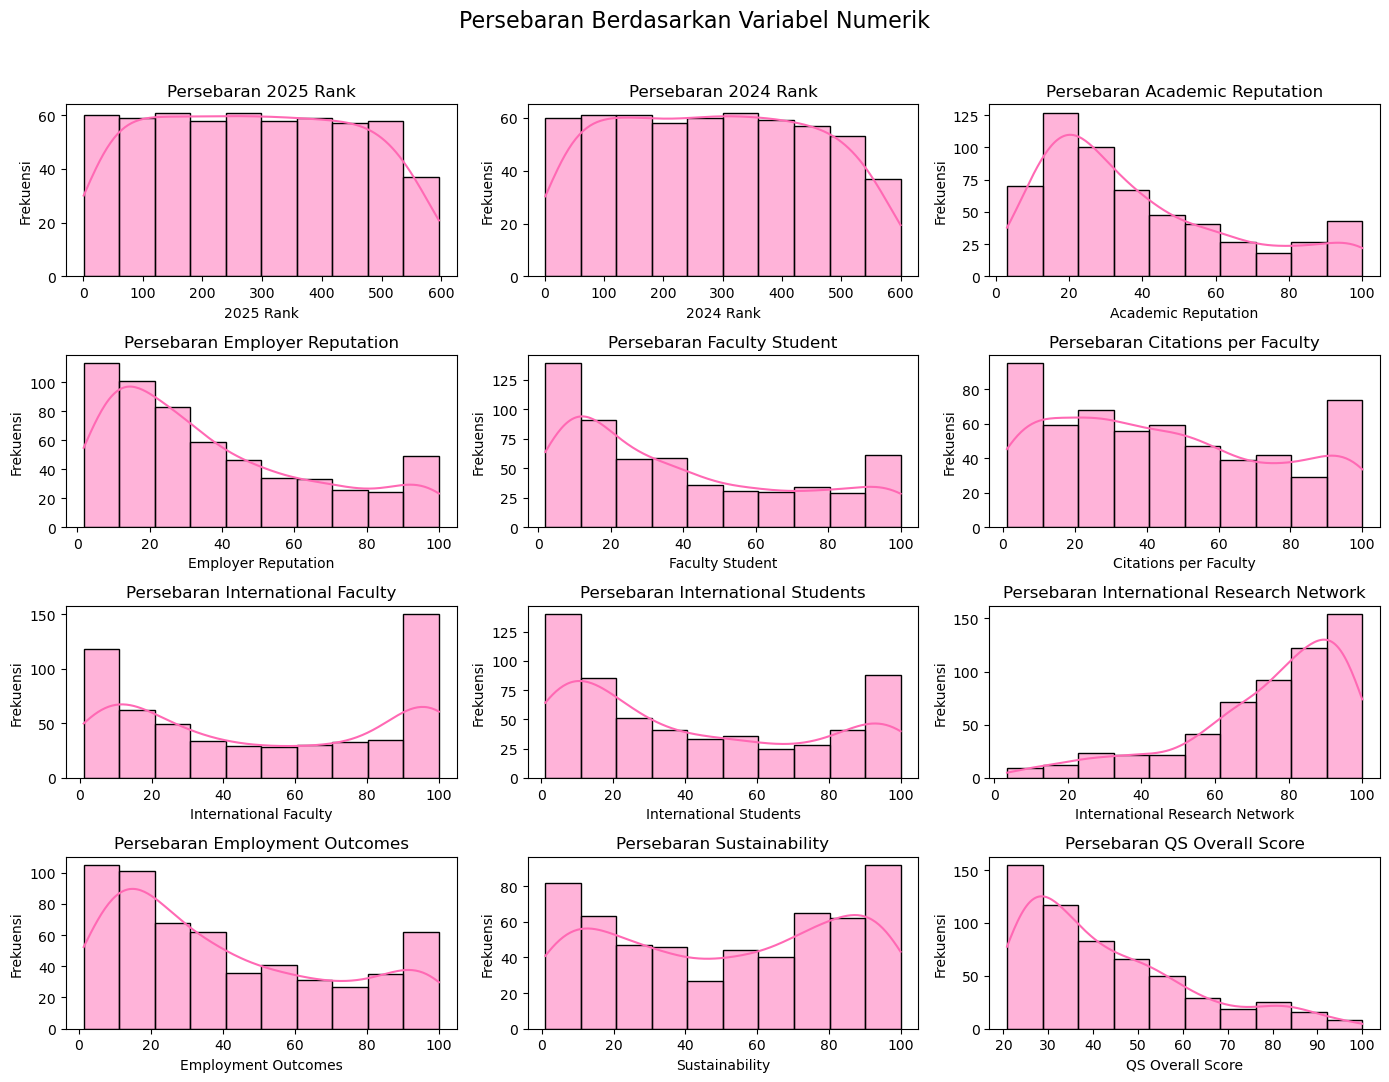

In [23]:
# Ambil kolom numerik
num_cols = df_done.select_dtypes(include='number').columns

# Set ukuran figure
plt.figure(figsize=(14, 11))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)  # sesuaikan grid jika jumlah kolom berbeda
    sns.histplot(
        df_done[col],
        bins=10,
        kde=True,
        color="hotpink",
        edgecolor="black"
    )
    plt.title(f"Persebaran {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")

plt.suptitle("Persebaran Berdasarkan Variabel Numerik", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Berdasarkan persebaran pada visualisasi yang didapatkan, pola yang terlihat adalah sebagai berikut.
1. 2025 Rank dan 2024 Rank
   * Persebaran relatif merata, namun cenderung lebih banyak di peringkat menengah sampai ke bawah.
   * Semakin ke peringkat tinggi, jumlah universitas semakin sedikit.
   * Mayoritas universitas tidak berada di peringkat tinggi, melainkan tersebar di peringkat menengah hingga bawah.
2. Academic Reputation
   * Banyak universitas yang memiliki nilai rendah sampai menengah.
   * Sangat sedikit universitas dengan nilai academic reputation yang sangat tinggi.
3. Employer Reputation
   * Persebaran dominan pada nilai rendah hingga menengah.
   * Sebagian besar universitas belum dikenal luas oleh dunia industri sebagai pencetak lulusan unggul.
4. Faculty Student (Ratio)
   * Persebaran nilai rendah lebih banyak dan nilai tinggi relatif sedikit.
   * Banyak universitas yang masih memiliki rasio dosen-mahasiswa yang belum ideal.
5. Citations per Faculty
   * Persebaran cukup lebar, namun nilai yang tinggi hanya dimiliki oleh sedikit universitas.
   * Produktivitas dan dampak riset yang tinggi hanya terkonsentrasi pada universitas tertentu.
6. International Faculty & International Students
   * Banyak universitas yang berada pada nilai yang rendah dan hanya sebagian kecil yang mendukung internasional.
   * Internasional ini masih menjadi tantangan besar untuk sebagian besar universitas.
7. International Research Network
   * Persebaran cenderung ke nilai menengah hingga tinggi.
   * Kolaborasi riset internasional relatif lebih baik dibanding indikator internasional lainnya.
8. Employment Outcomes
   * Sebagian besar universitas berada di nilai rendah hingga menengah.
   * Tidak semua universitas mampu menunjukkan hasil lulusan yang kuat di dunia kerja.
9. Sustainability
   * Persebaran merata.
   * Banyak universitas yang memiliki nilai menengah hingga ke atas.
   * Isu keberlanjutan mulai diperhatikan oleh banyak universitas, meskipun tingkat pencapaiannya berbeda-beda.
10. QS Overall Score
    * Nilai rendah mendominasi dan nilai yang tinggi sangat jarang.
    * Skor keseluruhan QS yang tinggi hanya dimiliki oleh sedikit top universitas.

Visualisasi ini menunjukkan kesenjangan yang jelas antara top universitas dengan universitas lainnya, terutama pada aspek reputasi akademik, riset, dan daya saing global.

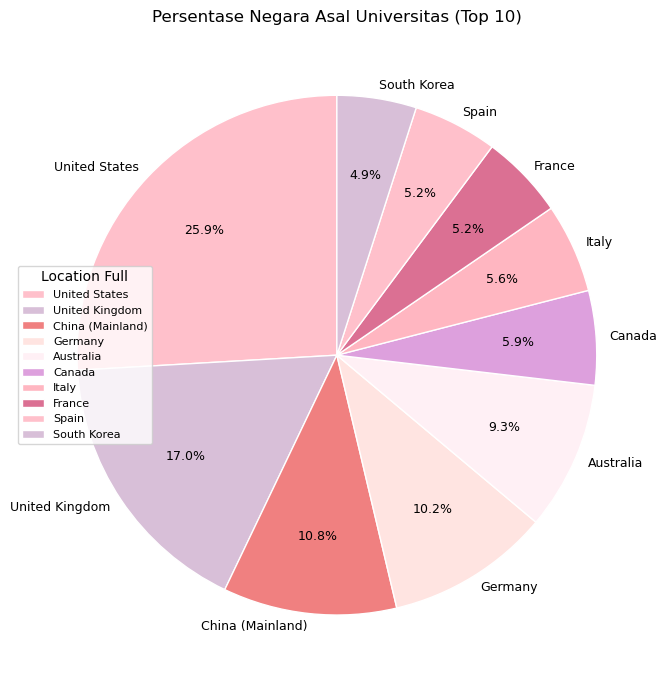

In [24]:
# Top 10 negara
country_counts = df_done["Location Full"].value_counts().head(10)
plt.figure(figsize=(7,7))
plt.pie(country_counts, labels=country_counts.index, autopct="%1.1f%%", startangle=90, pctdistance=0.7, labeldistance=1.05, textprops={'fontsize': 9}, colors=['pink', 'thistle', 'lightcoral', 'mistyrose', 'lavenderblush', 'plum', 'lightpink', 'palevioletred'], wedgeprops={'edgecolor': 'white'})
plt.legend(country_counts.index, title="Location Full", fontsize=8, title_fontsize=10, loc="center left", frameon=True)
plt.title("Persentase Negara Asal Universitas (Top 10)", fontsize=12)
plt.tight_layout()
plt.show()

Visualisasi ini menunjukkan sepuluh negara dengan jumlah universitas terbanyak dalam dataset QS World University Ranking. 

Terlihat bahwa **United States** memiliki persentase jumlah negara asal universitas terbanyak.

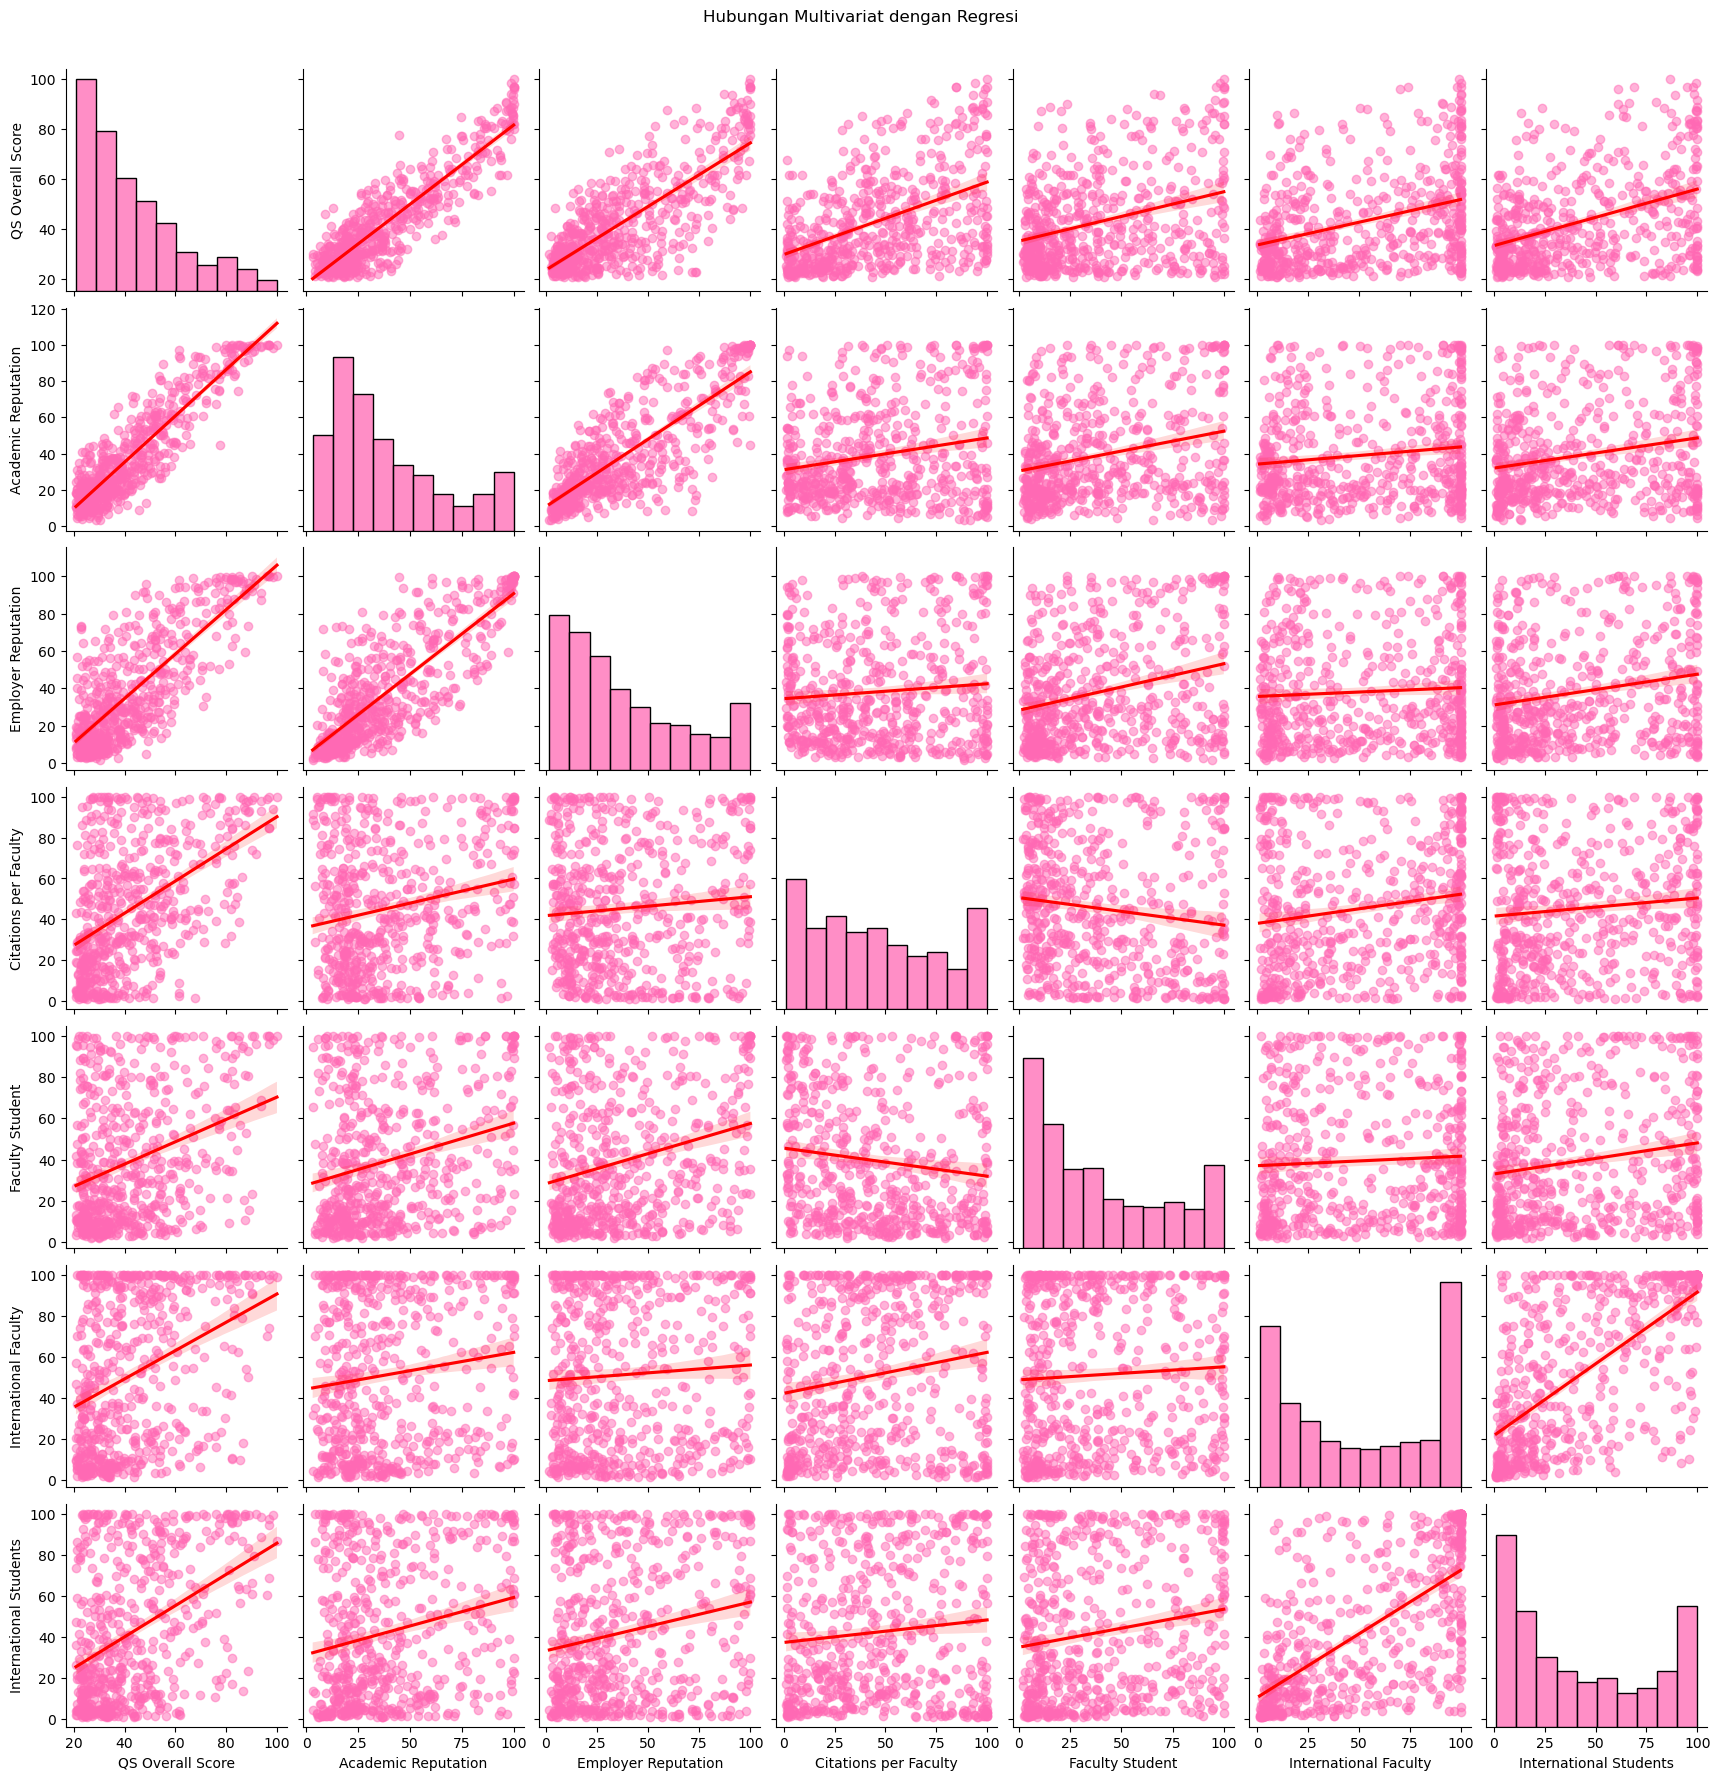

In [25]:
# Memvisualisasikan multivariat dengan regresi dengan fokus pada QS Overall Score dan enam aspek utama
sns.pairplot(df_done[["QS Overall Score", "Academic Reputation", "Employer Reputation", "Citations per Faculty", "Faculty Student", "International Faculty","International Students"]],
    kind="reg", #regresi
    diag_kind="hist", #histogram
    plot_kws={
        "scatter_kws": {
            "color": "hotpink",
            "alpha": 0.5
        },
        "line_kws": {
            "color": "red" 
        }
    },
    diag_kws={
        "bins": 10,
        "edgecolor": "black",
        "color": "hotpink"
    }
)
plt.suptitle("Hubungan Multivariat dengan Regresi", y=1.02)
plt.show()

Visualisasi ini dilakukan untuk mengetahui hubungan dari aspek utama untuk pengukuran QS Overall Score, aspek-aspek utama tersebut diperoleh dari link berikut: https://campus.quipper.com/kampuspedia/qs-world-university.

Berdasarkan visualisasi, informasi yang dapat diperoleh adalah sebagai berikut.
* Academic Reputation memang memiliki korelasi (hubungan) positif yang paling kuat dengan QS Overall Score, hal ini dikarenakan bobot penilaiannya yang paling banyak, yaitu 40% dari perolehan survei.
* Employer Reputation juga memiliki korelasi positif yang kuat dengan QS Overall Score, hal ini dikarenakan bobot penilaiannya diambil dari 10% perolehan survei dari 75.000 respondeds.
* Citations per Faculty juga menunjukkan korelasi yang positif, tetapi lebih menyebar. Hal ini diindikasikan adanya kesenjangan performa riset antar universitas.
* Faculty Student (ratio) memiliki korelasi paling lemah terhadap QS Overall Score, hal ini diindikasikan karena indikator ini lebih mencerminkan aspek operasional internal, bukan reputasi atau dampak akademik global yang menjadi fokus utama untuk QS Ranking.

Oleh karena itu, berdasarkan visualisasi, semakin tinggi Academic Reputation dan Employer Reputation, semakin tinggi pula QS Overall Score karena memiliki pengaruh yang paling kuat.

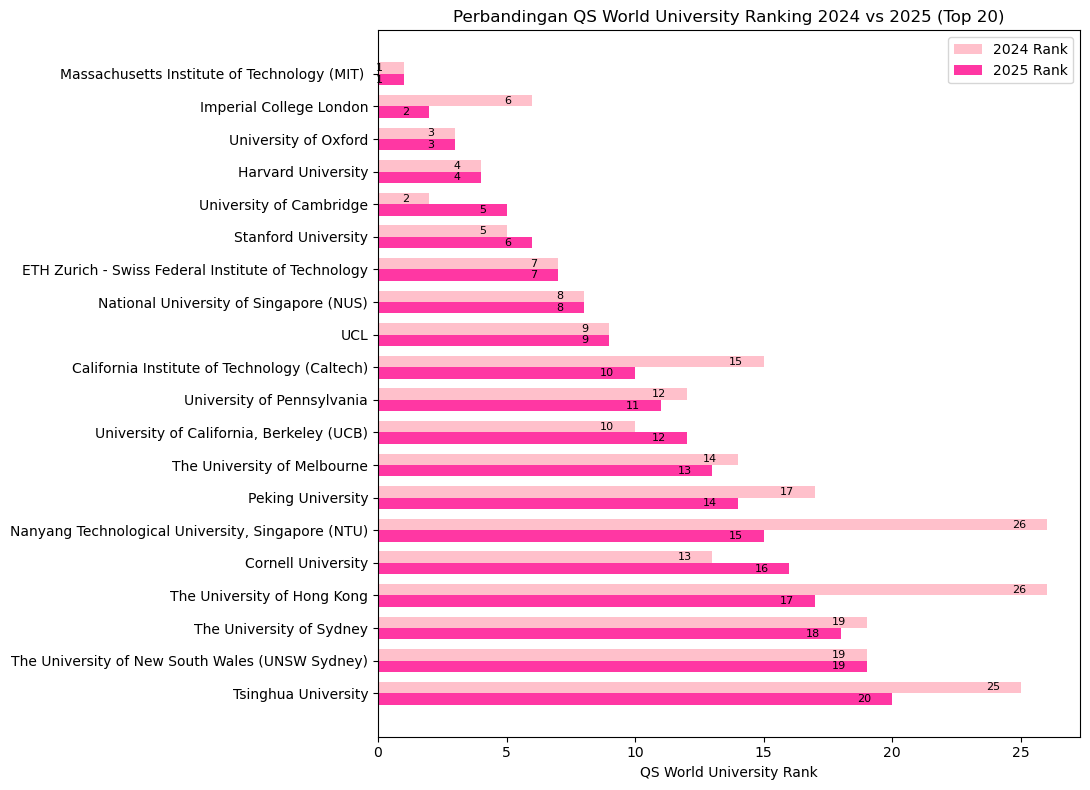

In [26]:
# Perbandingan TOP 20
top20 = df_done.sort_values("2025 Rank").head(20).reset_index(drop=True)

y = np.arange(len(top20))
h = 0.35

plt.figure(figsize=(11,8))

bars_2024 = plt.barh(y - h/2, top20["2024 Rank"], height=h, color="pink", label="2024 Rank")
bars_2025 = plt.barh(y + h/2, top20["2025 Rank"], height=h, color="deeppink", alpha=0.85, label="2025 Rank")

plt.yticks(y, top20["Institution Name"])
plt.xlabel("QS World University Rank")
plt.title("Perbandingan QS World University Ranking 2024 vs 2025 (Top 20)")
plt.legend()
plt.gca().invert_yaxis()

# Menambahkan label angka
for bar in bars_2024:
    plt.text(bar.get_width() - 0.8, bar.get_y() + bar.get_height()/2, f"{int(bar.get_width())}", va="center", ha="right", fontsize=8, color="black")
for bar in bars_2025:
    plt.text(bar.get_width() - 0.8, bar.get_y() + bar.get_height()/2, f"{int(bar.get_width())}", va="center", ha="right", fontsize=8, color="black")

plt.tight_layout()
plt.show()

Visualisasi ini membandingkan **QS World University Ranking tahun 2024 dan 2025** untuk **20 universitas terbaik berdasarkan 2025 Rank**, sehingga memperlihatkan **perubahan posisi per universitas secara langsung**.

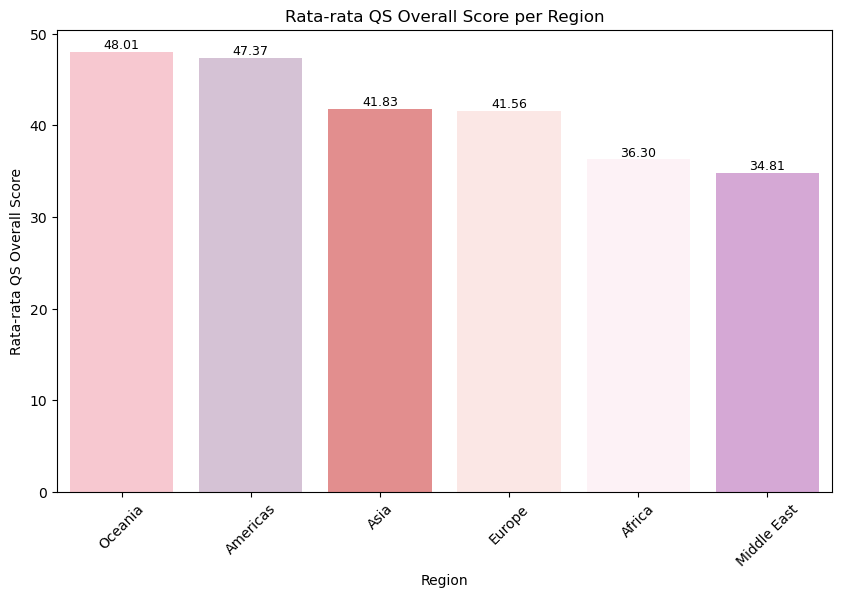

In [27]:
# Membandingkan rata-rata QS Overall Score dengan region 
avg_qs_region = (df_done.groupby("Region", as_index=False)["QS Overall Score"].mean().sort_values("QS Overall Score", ascending=False)) 
plt.figure(figsize=(10,6)) 
ax = sns.barplot(data=avg_qs_region, x="Region", y="QS Overall Score", hue="Region", palette=['pink', 'thistle', 'lightcoral', 'mistyrose', 'lavenderblush', 'plum'], legend=False) 

# Tambahkan label nilai rata-rata di atas bar 
for container in ax.containers: ax.bar_label(container, fmt="%.2f", fontsize=9) 
plt.title("Rata-rata QS Overall Score per Region") 
plt.xlabel("Region") 
plt.ylabel("Rata-rata QS Overall Score") 
plt.xticks(rotation=45) 
plt.show()

Visualisasi di atas menunjukkan bahwa **Region** dengan **rata-rata QS Overall Score** yang **lebih tinggi** menunjukkan **tingkat kualitas pendidikan tinggi yang lebih matang dan kompetitif secara global**, sementara Region dengan nilai yang **lebih rendah** mengindikasikan **adanya tantangan dalam pengembangan kualitas universitas**.

Perbedaan nilai rata-rata antar Region menunjukkan adanya kesenjangan kualitas pendidikan tinggi secara global. Namun, karena menggunakan nilai rata-rata, analisis ini belum menangkan variasi internal antar universitas di setiap region.

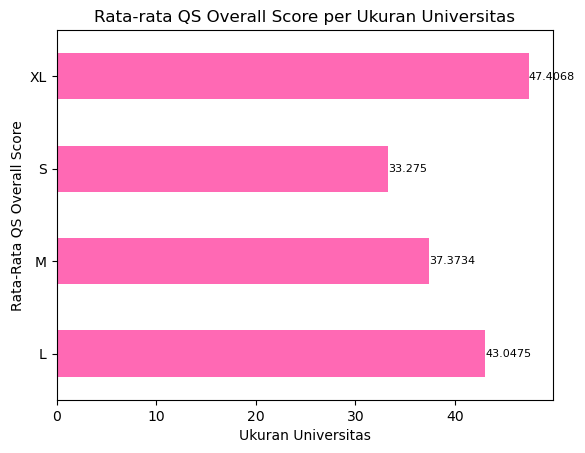

In [29]:
# Rata-rata QS Overall Score per Size
ax = df_done.groupby("Size")["QS Overall Score"].mean().plot(kind="barh",color="hotpink")
plt.title("Rata-rata QS Overall Score per Ukuran Universitas")
for container in ax.containers: 
    ax.bar_label(container, fontsize=8)
plt.xlabel("Ukuran Universitas")
plt.ylabel("Rata-Rata QS Overall Score")
plt.show()

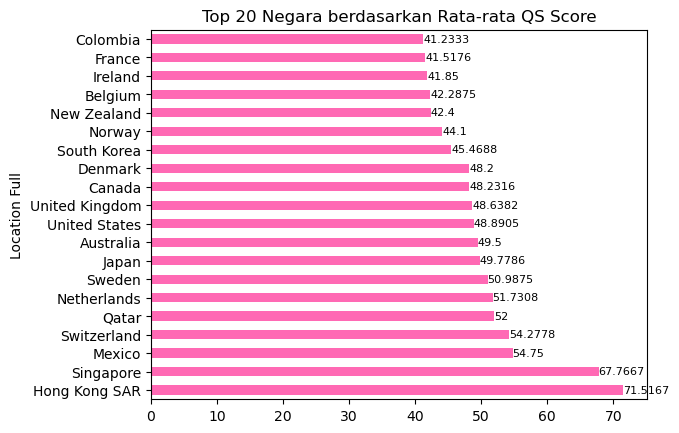

In [30]:
# Rata-rata QS Overall Score per Negara (Top 20)
ax = df_done.groupby("Location Full")["QS Overall Score"].mean().sort_values(ascending=False).head(20).plot(kind="barh",color="hotpink")
for container in ax.containers: 
    ax.bar_label(container, fontsize=8)
plt.title("Top 20 Negara berdasarkan Rata-rata QS Score")
plt.show()

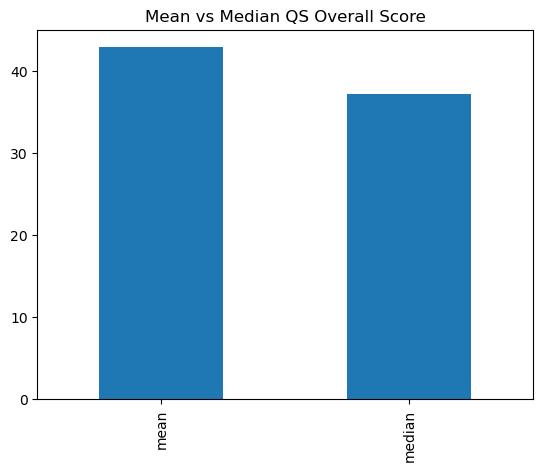

In [31]:
# Mean dan Median QS Overall Score
df_done["QS Overall Score"].agg(["mean","median"]).plot(kind="bar")
plt.title("Mean vs Median QS Overall Score")
plt.show()

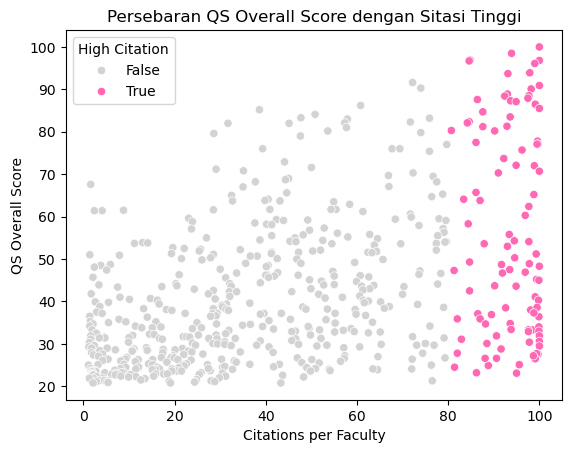

In [32]:
# Mengetahui persebaran dengan sitasi tertinggi
high_cite = df_done.copy()
high_cite["High Citation"] = high_cite["Citations per Faculty"] > 80

sns.scatterplot(
    data=high_cite,
    x="Citations per Faculty",
    y="QS Overall Score",
    hue="High Citation",
    palette={True: "hotpink", False: "lightgrey"}
)

plt.title("Persebaran QS Overall Score dengan Sitasi Tinggi")
plt.show()

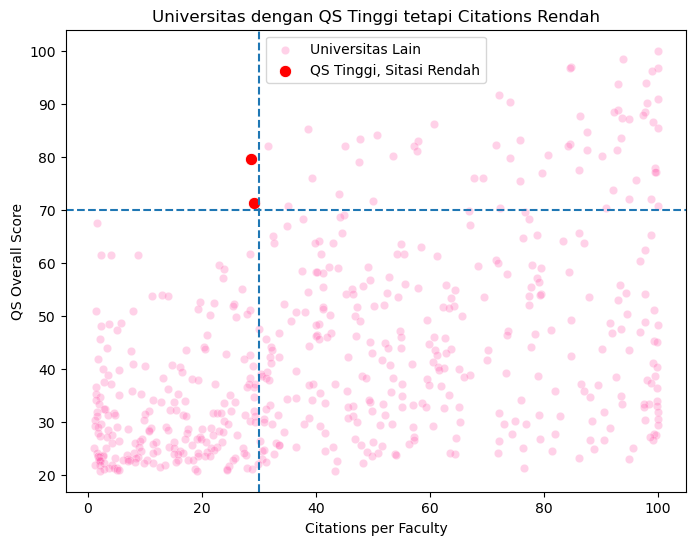

In [33]:
# Mencari universitas dengan QS Overall Score tertinggi dengan sitasi rendah
df_special = df_done[(df_done["QS Overall Score"]>70) & (df_done["Citations per Faculty"]<30)]

plt.figure(figsize=(8,6))

# Semua universitas (background)
sns.scatterplot(
    data=df_done,
    x="Citations per Faculty",
    y="QS Overall Score",
    color="hotpink",
    alpha=0.3,
    label="Universitas Lain"
)

# Universitas khusus
sns.scatterplot(
    data=df_special,
    x="Citations per Faculty",
    y="QS Overall Score",
    color="red",
    s=80,
    label="QS Tinggi, Sitasi Rendah"
)

plt.axhline(70, linestyle="--")
plt.axvline(30, linestyle="--")

plt.title("Universitas dengan QS Tinggi tetapi Citations Rendah")
plt.xlabel("Citations per Faculty")
plt.ylabel("QS Overall Score")
plt.legend()
plt.show()


Visualisasi ini menunjukkan bahwa:
1. Titik berwarna pink merepresentasikan seluruh universitas sebagai konteks umum.
   * Terlihat adanya kecenderungan bahwa semakin tinggi sitasi per fakultas, semakin tinggi pula QS Overall Score, yang mengindikasikan bahwa performa riset merupakan salah satu faktor penting dalam penilaian QS.
2. Titik berwarna merah menyoroti sejumlah universitas yang tetap memperoleh QS Overall Score tinggi meskipun memiliki sitasi rendah.
   * Hal ini menunjukkan bahwa sitasi bukan satu-satunya penentu peringkat QS.
   * Universitas-universitas tersebut kemungkinan memperoleh skor tinggi dari indikator lain seperti Academic Reputation, Employer Reputation, Faculty Student (ratio), serta Employment Outcomes.

Garis batas pada nilai QS Overall Score = 70 dan Citations per Faculty = 30 berfungsi sebagai **ambang analisis** untuk **mengidentifikasi universitas yang secara strategis unggul dalam faktor non-riset**. Dengan demikian, visualisasi ini menegaskan bahwa **strategi peningkatan peringkat QS** dapat dilakukan melalui jalur **selain peningkatan sitasi**, khususnya bagi universitas yang lebih berorientasi pada kualitas pengajaran, reputasi, dan outcomes lulusan.

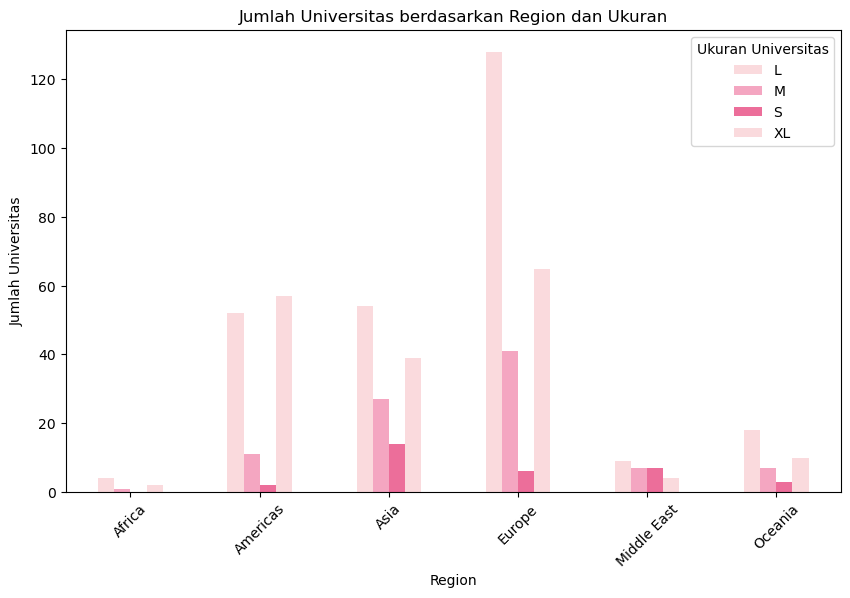

In [34]:
# Membuat visualisasi jumlah universitas berdasarkan Region dan Size
ct_region_size = pd.crosstab(df_done["Region"], df_done["Size"])

ct_region_size.plot(kind="bar", figsize=(10,6), color=["#FADADD", "#F4A6C1", "#EC6E9A"])

plt.title("Jumlah Universitas berdasarkan Region dan Ukuran")
plt.xlabel("Region")
plt.ylabel("Jumlah Universitas")
plt.xticks(rotation=45)
plt.legend(title="Ukuran Universitas")
plt.show()

Visualisasi ini menunjukkan bahwa:
1. Universitas berukuran L (large) mendominasi hampir semua region, terutama di **Europe** dan **Americas**.
2. Asia memiliki variasi ukuran yang lebih seimbang, menunjukkan keberagaman tipe institusi.
3. **Africa** dan **Oceania** memiliki jumlah universitas yang lebih sedikit dan cenderung terkonsentrasi hanya pada ukuran tertentu.

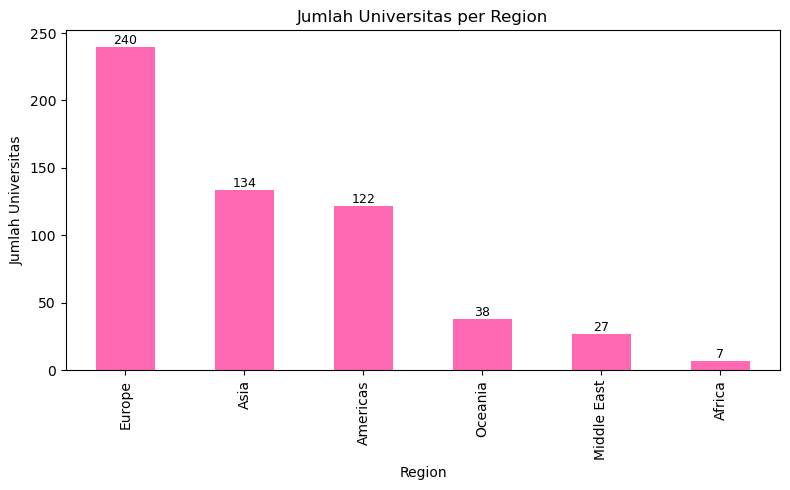

In [35]:
# Membuat visualisasi jumlah universitas per region
ct_region_inst = df_done.groupby("Region")["Institution Name"].count()

plt.figure(figsize=(8,5))

ax = ct_region_inst.sort_values(ascending=False).plot(
    kind="bar",
    color="hotpink"
)

# Tambahkan label nilai di atas bar
for container in ax.containers:
    ax.bar_label(container, fontsize=9)

plt.title("Jumlah Universitas per Region")
plt.xlabel("Region")
plt.ylabel("Jumlah Universitas")
plt.tight_layout()
plt.show()

Visualisasi ini menunjukkan persebaran jumlah universitas yang masuk dalam QS World University Ranking berdasarkan Region. Berdasarkan visualisasi, **Europe** memiliki jumlah **universitas terbanyak** dalam QS World Ranking, sedangkan **Africa** memiliki jumlah **universitas yang relatif jauh lebih sedikit** dibandingkan yang lainnya. Hal ini menunjukkan bahwa representasi universitas dalam pemeringkatan QS masih terkonsentrasi pada wilayah tertentu, khususnya Eropa dan Asia.

In [36]:
# Membuat data sample
N = 568
e = 0.05

# Rumus mengambil sample
n_sample = N / (1 + N * (e**2))

# Konversi ke integer dan simpan ke variabel
n_sample = int(n_sample)
print("Jumlah sample yang diambil sebanyak:", n_sample)

# Mengambil sample
df_sample = df_done.sample(n=n_sample, random_state=42)
df_sample

Jumlah sample yang diambil sebanyak: 234


Nama Kolom,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score,Region
218,219,217,National Yang Ming Chiao Tung University,TW,Taiwan,L,32.9,62.7,51.1,52.7,19.6,19.2,53.7,58.3,38.8,43.9,Asia
79,80,84,University of Birmingham,UK,United Kingdom,XL,68.9,69.0,39.0,40.5,92.6,89.3,97.5,44.5,96.8,64.1,Europe
104,105,104,The University of Sheffield,UK,United Kingdom,L,58.3,48.7,52.5,43.9,83.3,96.8,95.8,33.8,97.7,59.1,Europe
208,209,215,Tel Aviv University,IL,Israel,L,32.0,18.6,4.2,99.4,39.7,7.0,77.9,88.4,46.2,45.2,Middle East
565,565,444,University of Connecticut,US,United States,L,14.4,8.1,18.2,29.8,27.4,19.4,88.0,23.3,37.6,22.0,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,24,24,Université PSL,FR,France,L,74.4,97.6,98.1,87.6,62.3,65.0,99.8,97.1,73.4,84.7,Europe
496,489,561,Chongqing University,CN,China (Mainland),XL,7.6,4.6,12.1,81.4,21.3,2.1,59.6,13.6,4.1,24.5,Asia
319,320,264,University of Colorado Boulder,US,United States,XL,36.1,17.5,38.3,34.9,32.2,4.9,86.3,31.6,62.8,34.4,Americas
568,567,526,MGIMO University,RU,Russia,M,9.8,25.4,100.0,1.3,11.3,41.3,5.7,60.0,1.0,21.9,Europe


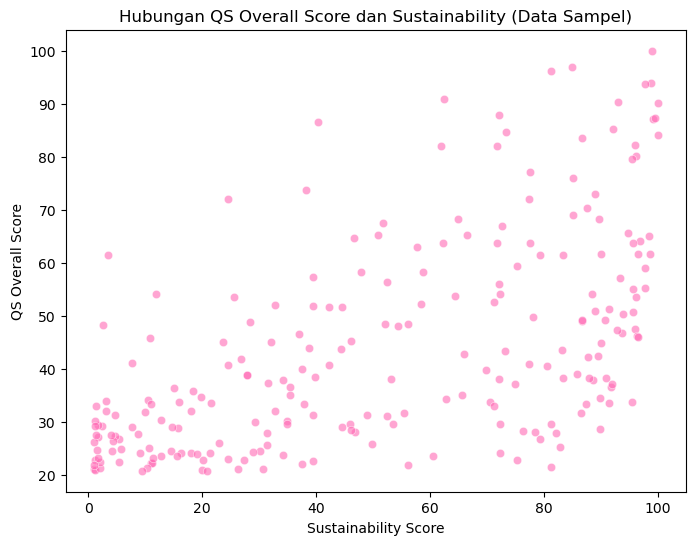

In [37]:
# Membuat visualisasi hubungan Overall Score dengan Sustainability menggunakan data sampel
plt.figure(figsize=(8,6))

sns.scatterplot(data=df_sample,x="Sustainability",y="QS Overall Score",color="hotpink",alpha=0.6)
plt.title("Hubungan QS Overall Score dan Sustainability (Data Sampel)")
plt.xlabel("Sustainability Score")
plt.ylabel("QS Overall Score")
plt.show()